In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing


In [23]:
laptops = pd.read_csv("Laptop_price.csv")

In [24]:
laptops.head(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


In [25]:
laptops.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [26]:
laptops["Brand"].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [27]:
laptops["RAM_Size"].value_counts()

RAM_Size
32    274
8     246
4     243
16    237
Name: count, dtype: int64

In [28]:
laptops["Screen_Size"].value_counts()

Screen_Size
11.185147    1
13.259182    1
15.376783    1
14.439339    1
13.025896    1
            ..
16.890244    1
13.702871    1
14.080209    1
16.935307    1
16.561498    1
Name: count, Length: 1000, dtype: int64

In [29]:
laptops["Storage_Capacity"].value_counts()

Storage_Capacity
256     357
1000    336
512     307
Name: count, dtype: int64

In [30]:
laptops = pd.get_dummies(laptops, columns=['Brand'], prefix='Brand', drop_first=True)

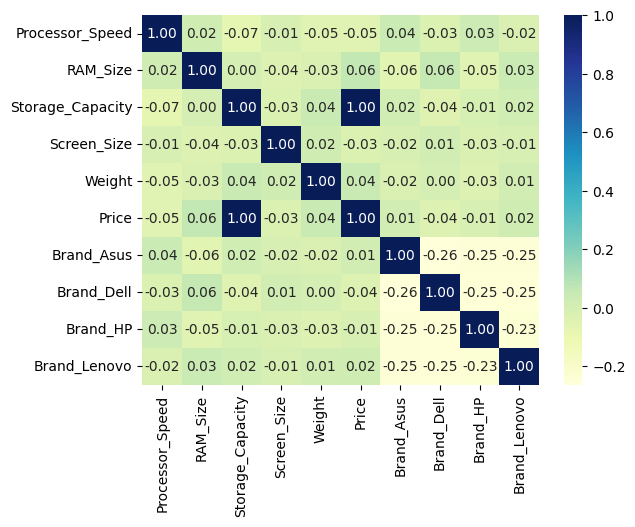

In [31]:
dataplot = sb.heatmap(laptops.corr(), cmap="YlGnBu", annot=True, fmt=".2f") 
# displaying heatmap 
plt.show() 

In [32]:
laptops["Screen_Size"] = pd.qcut(laptops["Screen_Size"], 10)

In [33]:

laptops.head(10)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,"(11.011000000000001, 11.642]",2.641094,17395.093065,True,False,False,False
1,2.912833,4,1000,"(11.011000000000001, 11.642]",3.260012,31607.605919,False,False,False,False
2,3.241627,4,256,"(11.642, 12.297]",2.029061,9291.023542,False,False,False,True
3,3.806248,16,512,"(11.642, 12.297]",4.573865,17436.728334,False,False,False,False
4,3.268097,32,1000,"(14.662, 15.243]",4.193472,32917.990718,False,False,False,False
5,1.881348,16,256,"(11.642, 12.297]",4.840268,9543.719980,False,False,True,False
6,2.940721,32,256,"(11.642, 12.297]",4.344846,10390.137319,False,False,False,True
7,3.016788,4,256,"(15.243, 15.762]",2.941120,9214.484506,False,False,False,True
8,2.560327,4,512,"(14.662, 15.243]",2.743620,16372.175284,False,False,False,True
9,3.341111,32,512,"(13.522, 14.1]",4.093149,18501.832733,False,False,False,False


In [34]:
laptops["Price"] = pd.qcut(laptops["Price"], 10)

In [35]:
laptops["Weight"] = pd.qcut(laptops["Weight"], 10)

In [36]:
laptops["Processor_Speed"] = pd.qcut(laptops["Processor_Speed"], 10)

In [37]:
def count_entropy(column: pd.Series, total: int) -> float:
    res: float = 0.0
    for num in column:
        if (num == 0):
            continue
        res += (num / total) * np.log2((num / total))
    return -res


def calculate_gain_ratio(data_set: pd.DataFrame, column: str, target_column: str) -> float:
    column_values: pd.Series[int] = data_set[column].value_counts()
    entropy_before: float = count_entropy(data_set[target_column].value_counts(), data_set[target_column].size)

    entropy_after:float = 0
    for colunm_value in column_values.keys():

        weight: float =  column_values[colunm_value] / data_set[target_column].size
        entropy_after += weight *  count_entropy(data_set[data_set[column] == colunm_value][target_column].value_counts(), column_values[colunm_value])
    

    column_entropy = count_entropy(data_set[column].value_counts(), data_set[column].size)
    return (entropy_before - entropy_after)/column_entropy
    

In [38]:
for column in laptops.columns:
    if column == "Price":
        continue
    print(column, calculate_gain_ratio(laptops, column, "Price"))

Processor_Speed 0.030039279520300492
RAM_Size 0.3753223327555702
Storage_Capacity 0.8781144810601569
Screen_Size 0.01722461683408392
Weight 0.021260678914871836
Brand_Asus 0.010028519950922509
Brand_Dell 0.01012888607813013
Brand_HP 0.008733972788757023
Brand_Lenovo 0.013044100832974406


In [39]:
result = pd.read_csv("Laptop_price.csv")
result = result[["RAM_Size", "Storage_Capacity", "Price"]]

In [46]:

result.reindex(np.random.permutation(result.index))
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(result)
result = pd.DataFrame(np_scaled, columns=["RAM_Size", "Storage_Capacity", "Price"])
result.to_csv("laptops_in.csv", index= False)

In [47]:
result.head(10)

,RAM_Size,Storage_Capacity,Price
0,0.428571,0.344086,0.353939
1,0.000000,1.000000,0.923946
2,0.000000,0.000000,0.028917
3,0.428571,0.344086,0.355609
4,1.000000,1.000000,0.976500
5,0.428571,0.000000,0.039051
6,1.000000,0.000000,0.072998
7,0.000000,0.000000,0.025847
8,0.000000,0.344086,0.312914
9,1.000000,0.344086,0.398326
